# Prosper Loan Data Exploration
## by Hao Xu

## Preliminary Wrangling


This document explores **Prosper Loan Dataset**. Prosper is America's first peer-to-peer lending company. Before exploration, I think there are two important things need to pay much attation:
1. Prosper stoped its business in 2008, and reopened their business after having obtained SEC registration for its loans on July 13 2009.
2. After Prosper's reopening, lenders simply choose whether or not to invest at the rate which Prosper's loan pricing algorithm assigns to the loan after it analyzes the borrower's credit report and financial information(no longer determine the loan rate via price discovery in an auction).

(Reference Wikipedia)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# load in the dataset into a pandas dataframe
# High-level overview of data shape and composition
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# see the data type
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [4]:
# descriptive statistics for numeric variables
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [5]:
# change the datatype of ListingCreationDate to timestamp
df["ListingCreationDate"] = df["ListingCreationDate"].astype("datetime64")

# Prosper using a new loan pricing algorithm
# Prosper using a new loan pricing algorithm in July 2009, I want to investgate its new pricing model, 
# so I only need data after
# df2 = df[df['ListingCreationDate']>= pd.Timestamp(2009,7,13)]


In [6]:
# set a function to convert columns(with null values) from float datatype to string
def float_to_str(df,col):
    '''
    INPUT:
    df - the pandas dataframe
    col - the column name to convert
    
    OUTPUT:
    str_col - column series with datatype of string
    '''
    def tail(str):
        if str == 'nan':
            return np.NaN
        else:
            return str[:-2]

    new_series = df[col].astype(str).apply(tail)
    
    return new_series

# add a column,'ProsperScore_order' , save the ordinal type of ProsperScore. I need keep the 
# float type for further correlation coefficient computing.
# convert datatype of ProsperScore to string use float_to_str function

df['ProsperScore_order']= float_to_str(df,'ProsperScore')

In [7]:
# convert ProsperRating (Alpha) ProsperScore into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore_order': ['1', '2', '3', '4', '5', '6', '7', '8','9','10','11']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    

In [8]:
# convert ListingCategory to string
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)

# get a dictionary of number and content
order_list = [str(i) for i in range(21)]
category_list = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
                'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring',
                'Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV',
                'Taxes','Vacation','Wedding Loans']
category_dict = dict(zip(order_list,category_list))

# set a function to change order number to content
def to_content(order):
    try:
        a = category_dict[order]
        return a
    except:
        return None

# change the column value to the text    
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].apply(to_content)


In [9]:
# check the result
df[['ListingCreationDate','ProsperRating (Alpha)','ProsperScore_order','ListingCategory (numeric)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
ListingCreationDate          113937 non-null datetime64[ns]
ProsperRating (Alpha)        84853 non-null category
ProsperScore_order           84853 non-null category
ListingCategory (numeric)    113937 non-null object
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 2.0+ MB


### What is the structure of your dataset?

There are 113,937 records in the dataset with 81 features. Most variables are numeric in nature, because there are many null value, most of these numeric columns have a float datatype. The variables ProsperRating (Alpha) and ProsperScore_order feature that I added are ordered factor variables with the following levels.

(lowest) ——> (highest) 
- ProsperRating (Alpha): 'HR', 'E', 'D', 'C', 'B', 'A', 'AA',
- ProsperScore_order : '1', '2', '3', '4', '5', '6', '7', '8','9','10','11'

### What is/are the main feature(s) of interest in your dataset?

I am most interested in after Prosper using a new loan pricing algorithm, the borrower rate is affected by what features. 
This question can divided into two parts:
- Borrowers with what features will not get a loan?
- How prosper price their loan?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

This data set has so much information, I think all 81 features can be devided into 3 sets:
- Basic features of the loan: date, term, amount, status, rate, estimate return, category and so on;
- Pre-loan management features: borrower credit, income, loan history and so on;
- Post-loan management features: principle outstanding/loss, default, fee and so on.

I want to see how Prosper price its loan, I just need the features from the first two sets.

Base on the tradeoff between risk and gain, I expect that the term and amount of the loan  and features about borrower's ability to repay will have the strongest effect on the borrower rate. The shorter the term the lower the interest rate, the strong the ability of the borrower to repay(for example a higher cerdit score), the lower the interest rate. I also consider, the borrower's history of repayment may affect the rate.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR

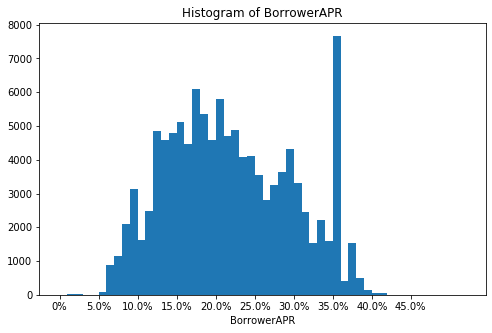

In [10]:
# start with a standard-scaled plot
bins = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
ticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
labels = ['{}%'.format(v*100) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR',bins = bins)
plt.xlabel('BorrowerAPR')
plt.xticks(ticks, labels )
plt.title('Histogram of BorrowerAPR')
plt.show()

The distribution of brrower APR is roughly unimodal with the peak around 18% APR, and is a bit right skewed. There also are two small peaks near 8% and 30%, and a single but very large spike near 35%.
I want to look into this large spike. 

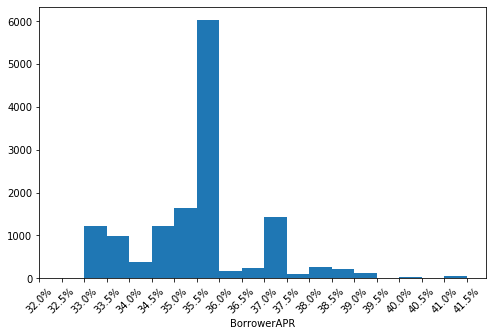

In [11]:
# use a set of smaller bins to look APR around 35%
df_35 = df.query('0.33 < BorrowerAPR <0.42')
plt.figure(figsize=[8, 5])
bins = np.arange(0.33,df_35.BorrowerAPR.max()+0.005,0.005)
ticks = [0.32+x*0.005 for x in range(20)]
labels = ['{}%'.format(v*100) for v in ticks]
plt.hist(data = df_35, x = 'BorrowerAPR', bins = bins);
plt.xticks(ticks, labels,rotation = 45)
plt.xlabel('BorrowerAPR')
plt.show();


There is a extrem high bar between 35.5% and 36%, it has nearly 6000 loans, is about 5% of all data sets. I will make some further research later.

Next, I want to see the characters of some basic aspect of loan(Term, ListingCreationDate, LoanOriginalAmount )

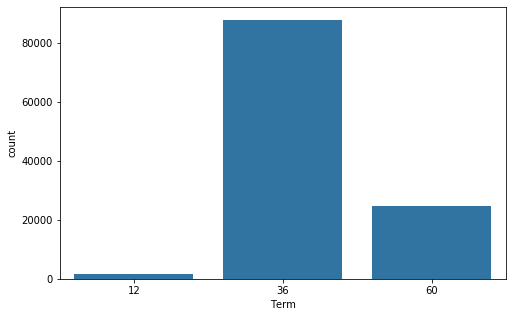

In [12]:
# plot Term with a standard-scaled plot
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term',color = base_color)
plt.show()


There are only 3 kind of terms, 1year, 3 years and 5 years. Most of the loans have the term of 3 years.

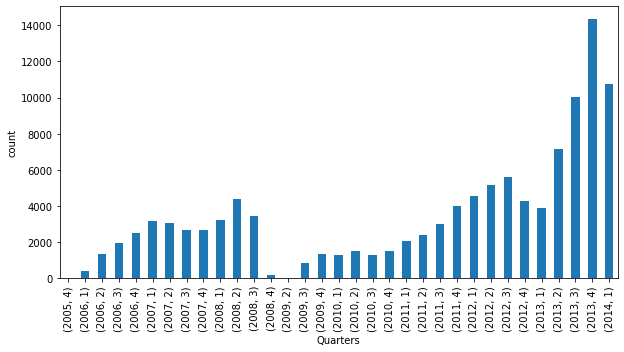

In [14]:
# plot the quarterly time distribution of loans
plt.figure(figsize=[10, 5])
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).count()['Term'].plot(kind = 'bar')
plt.xlabel('Quarters')
plt.ylabel('count')
plt.show()


The count of loans in each quarter can be divided into two sections: from the Q4 2005 to Q3 2008, and from Q3 2009 to Q1 2014. Within each section, the count keep increasing overtime(Q4 2012 and Q1 2013 have a bit decrise). From Q4 2008 to Q3 2009, there is a gap, maybe that's because Prosper pause its business by following SEC's requests.

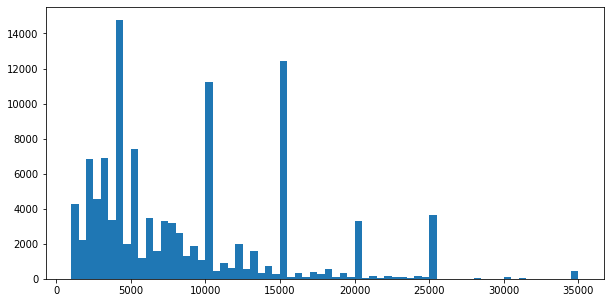

In [15]:
# standard plot of loan amount
plt.figure(figsize=[10, 5])
bins = np.arange(1000, df.LoanOriginalAmount.max()+500, 500)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.show()


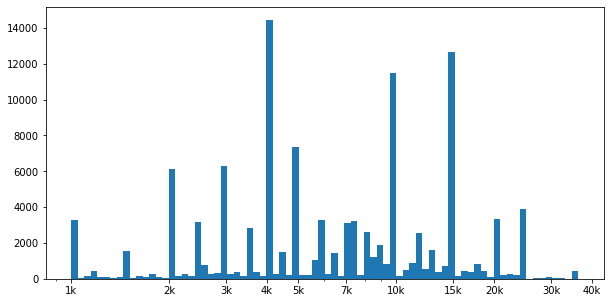

In [16]:
# there's a long tail in the distribution, I polt a log scale as addition
plt.figure(figsize=[10, 5])
ticks = [1000,2000,3000,4000,5000,7000,10000,15000,20000,30000,40000]
labels = ['1k','2k','3k','4k','5k','7k','10k','15k','20k','30k','40k']
bins = 10 ** np.arange(3, np.log10(df.LoanOriginalAmount.max())+0.02, 0.02)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.show()

The distribute of amount has a long tail on the right side with several very high spikes. It shows that most of the loans have a amount less than 10k, but at 15k, 20k and 25k there are three high counts. After ploted on a log-scale, I can see more clearly, the amount of most loans are multiples of 500, the most favorite amounts are  4k, 15k and 10k. Maybe that's mainly because people like the number with lots of zeros.

In [17]:
# I want to plot credit score related columns(Prosper Rating,Prosper Score and CreditScoreRange)
# First see what's the difference of CreditScoreRangeLower and CreditScoreRangeUpper
(df['CreditScoreRangeLower'] - df['CreditScoreRangeUpper']).value_counts()

-19.0    113346
dtype: int64

I can see every pair of lower and upper credit score have a differ of 19, so I only need to choose lower boundary to plot。

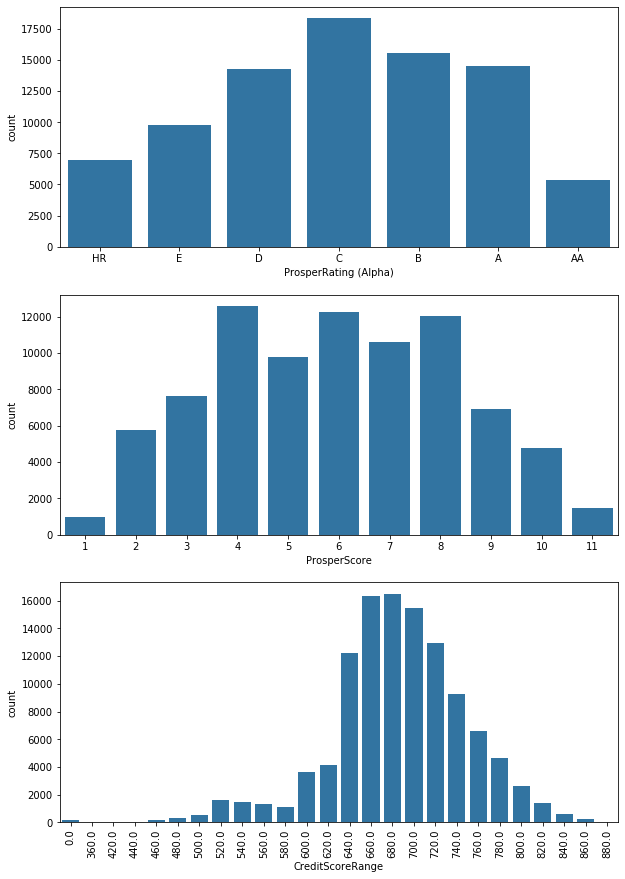

In [18]:
# plot all three credit related columns together(ProsperRating,ProsperScore and CreditScoreRangeLower).
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,15])

plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)',color = base_color)

plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'ProsperScore_order',color = base_color)
plt.xlabel('ProsperScore')

plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'CreditScoreRangeLower',color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('CreditScoreRange')
plt.show()


All three plots are roughly unimodal, and are not extremly left or right skewed. They show that, people with middle level credit (prosper rating C, prosper score from 4 to 8  or creditscore from 660 to 720) have the hightest number of loans.

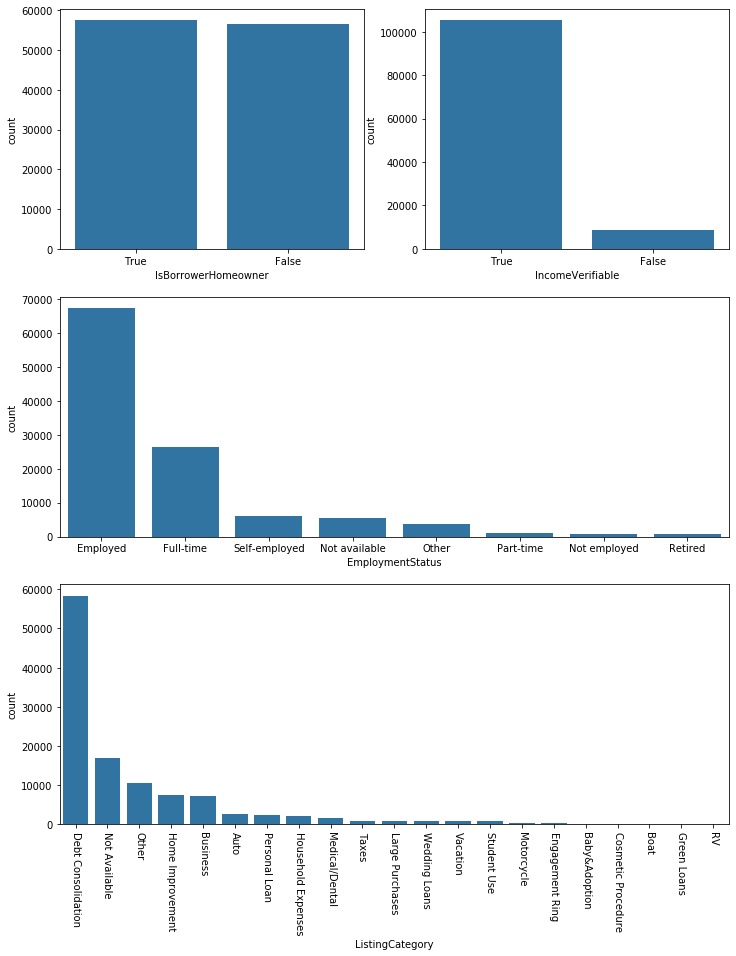

In [19]:
# plot the count of homeowner, employmentstatus and job category
plt.figure(figsize = [12,15])
base_color = sb.color_palette()[0]

plt.subplot(3, 2, 1)
category_order1 = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner',color = base_color, order = category_order1)

plt.subplot(3, 2, 2)
category_order1 = df['IncomeVerifiable'].value_counts().index
sb.countplot(data = df, x = 'IncomeVerifiable',color = base_color, order = category_order1)


plt.subplot(3, 2, (3,4))
category_order2 = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df, x = 'EmploymentStatus',color = base_color, order = category_order2)

plt.subplot(3, 2, (5,6))
category_order3 = df['ListingCategory (numeric)'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory (numeric)',color = base_color, order = category_order3)
plt.xticks(rotation = 270)
plt.xlabel('ListingCategory')

plt.show()


Wether the borrower is a homeowner does not obviously effect the number of loans. 

Most of the borrowers have their income verified.

Most of the loans are given to those with a job.

Borrowed money are mainly used for debt consolidation, then used for home imporvement and business.

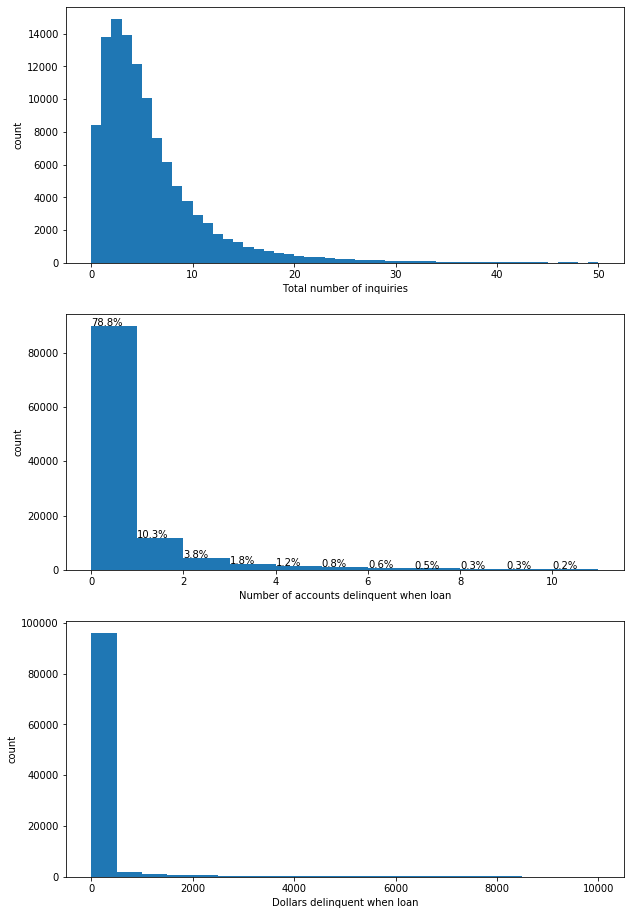

In [20]:
# plot totalinquiries,currentlinquiries,amountlinquiries
plt.figure(figsize = [10,16])
base_color = sb.color_palette()[0]

plt.subplot(3, 1, 1)
bins = np.arange(0,50+1,1)
plt.hist(data = df, x = 'TotalInquiries',color = base_color,bins = bins)
plt.xlabel('Total number of inquiries')
plt.ylabel('count')

plt.subplot(3, 1, 2)
bins = np.arange(0,11+1,1)
plt.hist(data = df, x = 'CurrentDelinquencies',color = base_color,bins = bins)
plt.xlabel('Number of accounts delinquent when loan')
plt.ylabel('count')
for i in range (11):
    count = df.CurrentDelinquencies.value_counts()[i]
    pct_string = '{:.1%}'.format(count/df.shape[0])
    plt.text(i,count+1,pct_string, va = 'baseline');

plt.subplot(3, 1, 3)
bins = np.arange(0,10000+500,500)
plt.hist(data = df, x = 'AmountDelinquent',color = base_color,bins = bins)
plt.xlabel('Dollars delinquent when loan')
plt.ylabel('count')

plt.show()

It shows that the vast majority of the borrowed have no or only a little delinquent history when loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The brrowerAPR variable mainly falled between 5% and 40%, and is roughly unimodal distributed with the peak around 18%.  There is a point near 35.5% with an extrem high count, and formed a very high spike. I will look deep into this in Bivariate Exploration.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the LoanOriginalAmount, it has a large range of values, I looked at the data using a log transform. Under the transformation, the data looked discrete distributed, the data gatherde at multiples of 500, and the most favorite amounts are 4k, 15k and 10k.


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [21]:
# list all interested features
numeric_vars   = ['BorrowerAPR', 'EstimatedLoss', 'LoanOriginalAmount','ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','OpenCreditLines',
                  'ListingCreationDate','TotalInquiries','CurrentDelinquencies', 'BankcardUtilization', 
                  'AvailableBankcardCredit','IncomeRange','StatedMonthlyIncome','Recommendations']
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeVerifiable','ProsperRating (Alpha)', 
                  'ProsperScore_order']


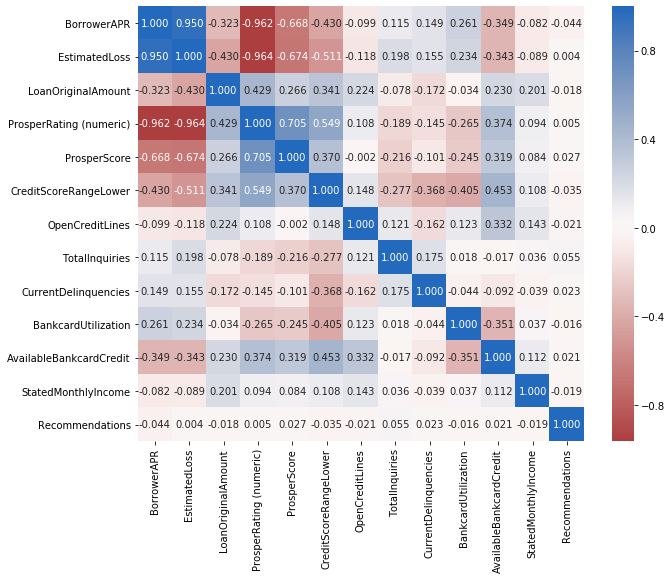

In [25]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars].corr(), xticklabels=True, yticklabels=True,annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

'ProsperRating' is so high correlated with BorrowerAPR and estimated loss, it seems that APR should cover the estimated loss, and they are both mainly deceided by ProsperRating.

'LoanOriginalAmount','CreditScoreRangeLower','BankcardUtilization', 'AvailableBankcardCredit' and 'CurrentDelinquencies' have some correlation with 'BorrowerAPR' (absolut correlation value >= 0.15)

I'll choose fewer features to get scatter plots

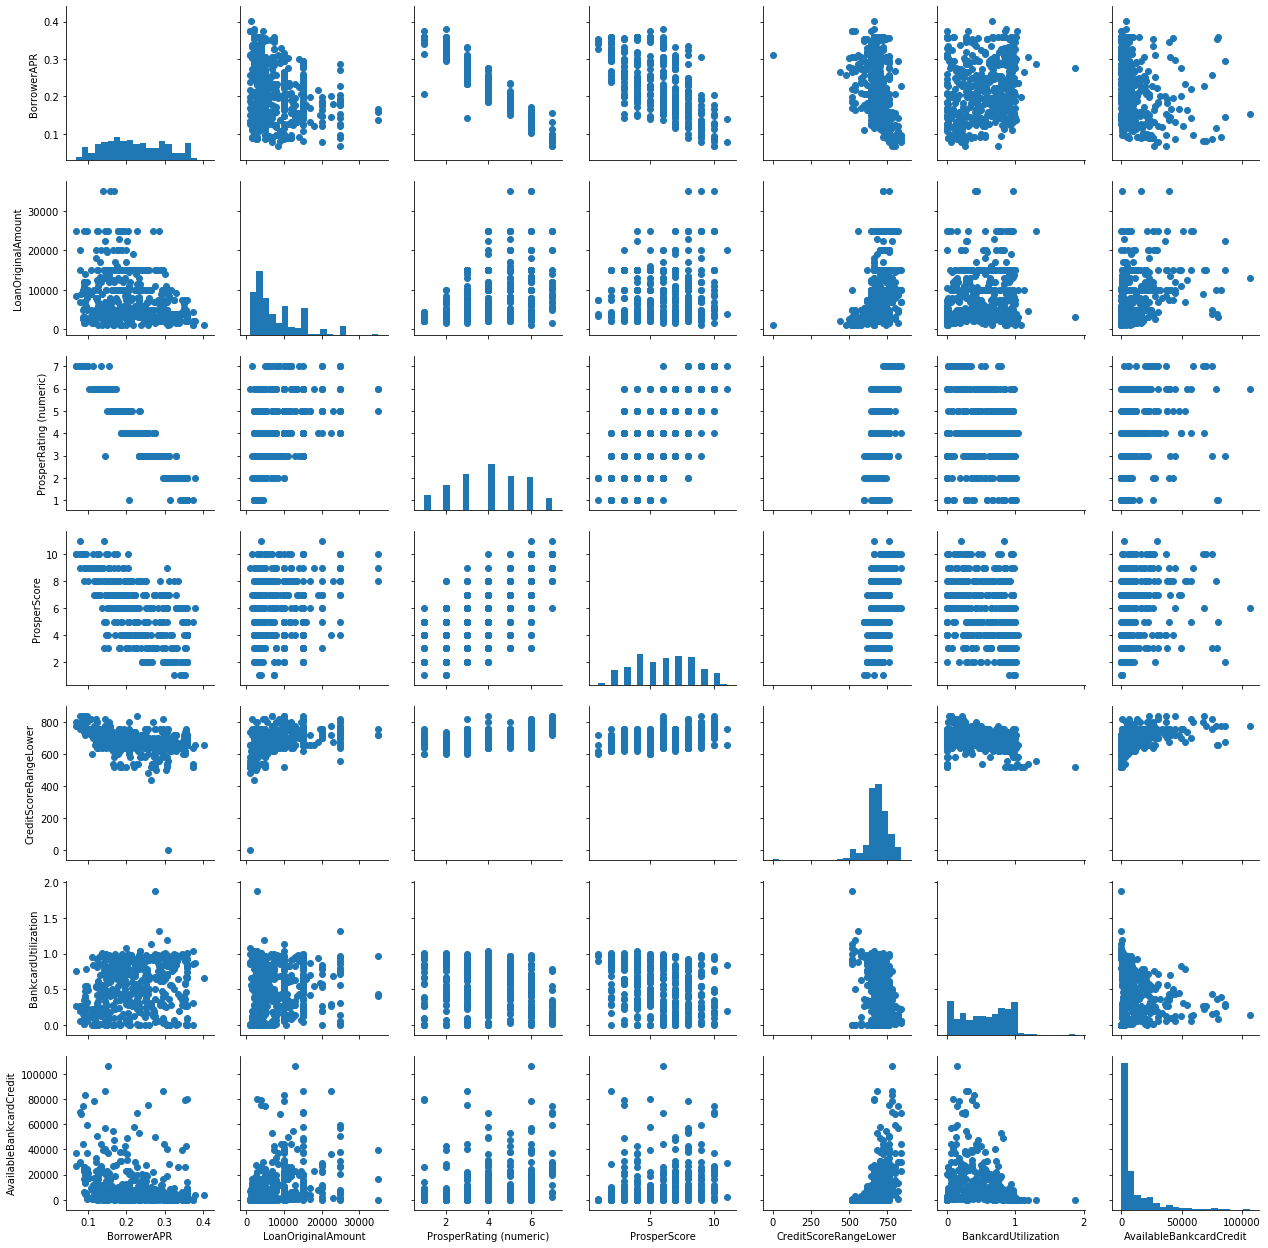

In [29]:
# choose a shorter list of numerical features.
numeric_vars_fewer = ['BorrowerAPR','LoanOriginalAmount','ProsperRating (numeric)',
                      'ProsperScore','CreditScoreRangeLower','BankcardUtilization',
                      'AvailableBankcardCredit']

# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars_fewer)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

There are some interesting discoveries:
1. It shows again, BorrowerAPR has a very strong correlation with ProsperRating.
2. When the loan amount increased, the volatility of borrower APR decreased. The scatter plot for credit score and APR is opposite, APR volatility convergent when cridit score decrised. The relationship of these three variables worth extra exploration.
3. Although the correlation coefficient of APR and current delinquencies is not high(-0.149), the scatter plot shows that, if the borrower has a higher current delinquencies, he/she can only get a higher APR loan.
4. APR and bankcard utilization rate are overall positive correlated. At the same time, APR and available bankcredit are negative correlated.I will also look deep into them later.

I'll move on to looking at how APR and loan amount correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

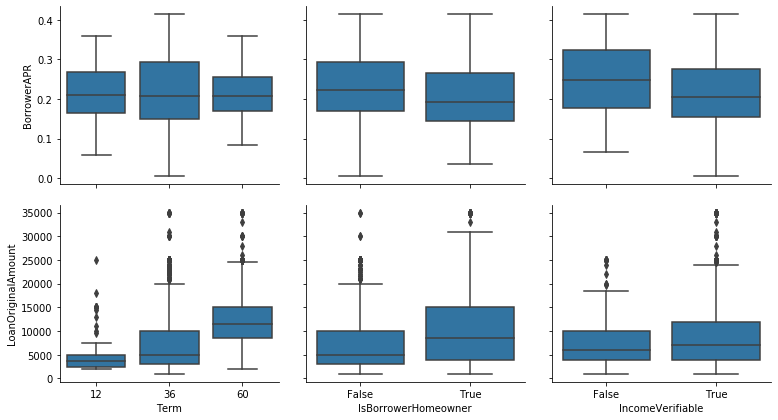

In [33]:
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeVerifiable',
                  'ProsperRating (Alpha)', 'ProsperScore_order']

# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 8000, replace = False)
df_samp = df.loc[samples,:]

#  Quick hack for creating box plots with seaborn's PairGrid. 
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars[:3],
                height = 3, aspect = 1.2)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

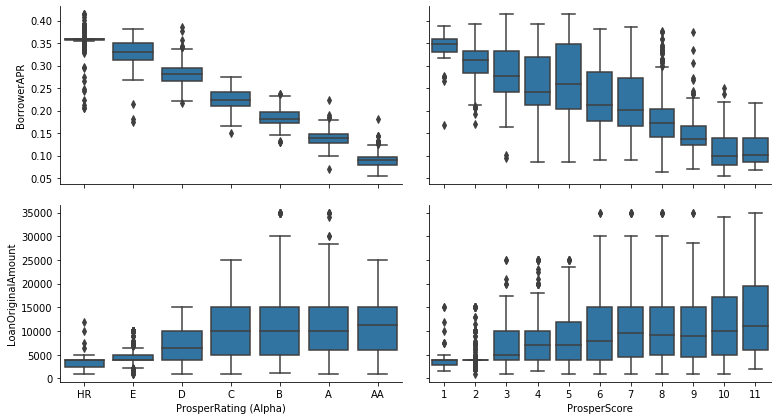

In [234]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = categoric_vars[3:],  height = 3, aspect = 1.8)
g.map(boxgrid)
plt.show();

It shows more clear, the high borrower's rating and score, the lower the APR. The 7 grade ProsperRating is even more obviously than ProsperScore. I think Prosper use these Prosper rating to determin the base borrower APR.

From the plot of rating/score vs loan amount, I can only find the borrower with low Rating/score can only borrow amount less than 10000.

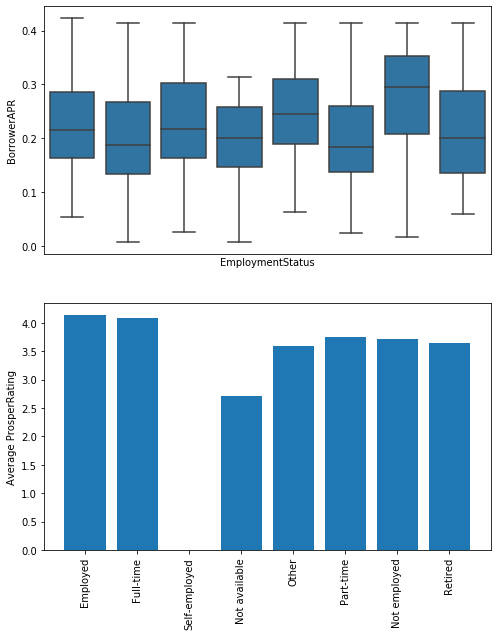

In [52]:
# see the relation with employment status
plt.figure(figsize = [8,10])

# plot APR vs employment status
plt.subplot(2,1,1)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR',color = base_color, 
           order = df['EmploymentStatus'].value_counts().index)
plt.xticks([]);

# plot average ProsperRating in each employment status
plt.subplot(2,1,2)
plt.bar(x = df['EmploymentStatus'].value_counts().index, 
        height = df.groupby('EmploymentStatus').mean()['ProsperRating (numeric)'])
plt.xticks(rotation = 90)
plt.ylabel('Average ProsperRating')
plt.show;

unemployed borrower's APR is higher than all other categories. And employed and full time have a higher Prosper rating.

Next, I will select several categorical features, and find their relationships.

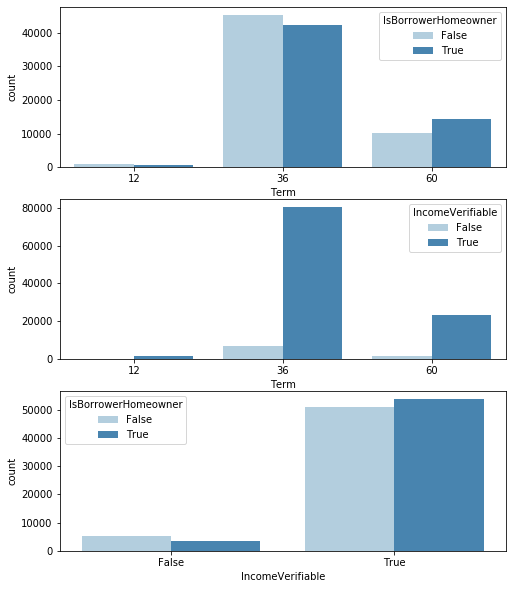

In [43]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 10])

# subplot 1: term vs homeowner
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'Term', hue = 'IsBorrowerHomeowner', palette = 'Blues')

# subplot 2: term vs IncomeVerifiable
plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'Term', hue = 'IncomeVerifiable', palette = 'Blues')

# subplot 1: homeowner vs IncomeVerifiable
plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IncomeVerifiable', hue = 'IsBorrowerHomeowner', palette = 'Blues')

plt.show()

There are more homeowner than non_honmewoner in long term loans and have income verifiated. But in medium and short term loans,or in unferified loans, more borrowers are not homeowner. It seems that homeowner is more trustworthy.

1. After 2009, there is no loans with credit score less than around 600 points. And loan with amount larger than around 25000 began to show up.

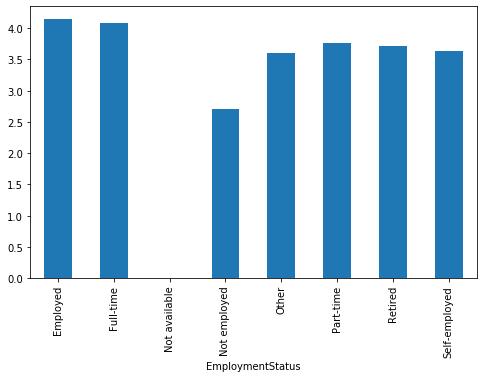

In [70]:
plt.figure(figsize=[8,5])
df.groupby('EmploymentStatus').mean()['ProsperRating (numeric)'].plot(kind = 'bar')


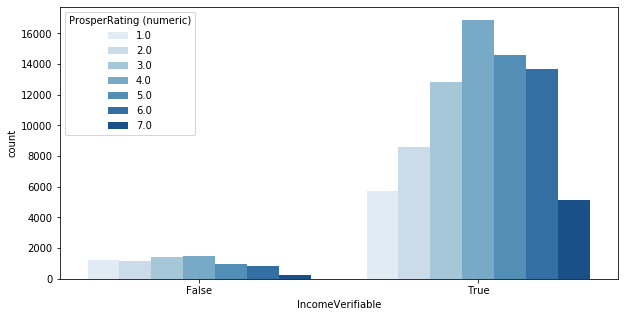

In [57]:
plt.figure(figsize = [10,5])
sb.countplot(data = df, x ='IncomeVerifiable', hue = 'ProsperRating (numeric)', palette = 'Blues')


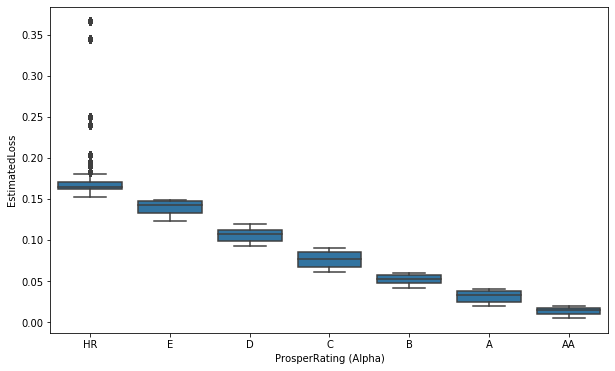

In [40]:
plt.figure(figsize = [10,6])
sb.boxplot(data = df, x ='ProsperRating (Alpha)' , y = 'EstimatedLoss', color = base_color)

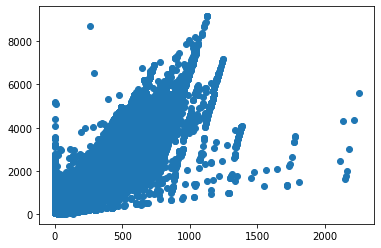

In [51]:
df0 = df.copy()
df0['a'] = df0['LoanOriginalAmount']*df0['BorrowerAPR']
plt.scatter(data = df0, x = 'MonthlyLoanPayment', y = 'a')

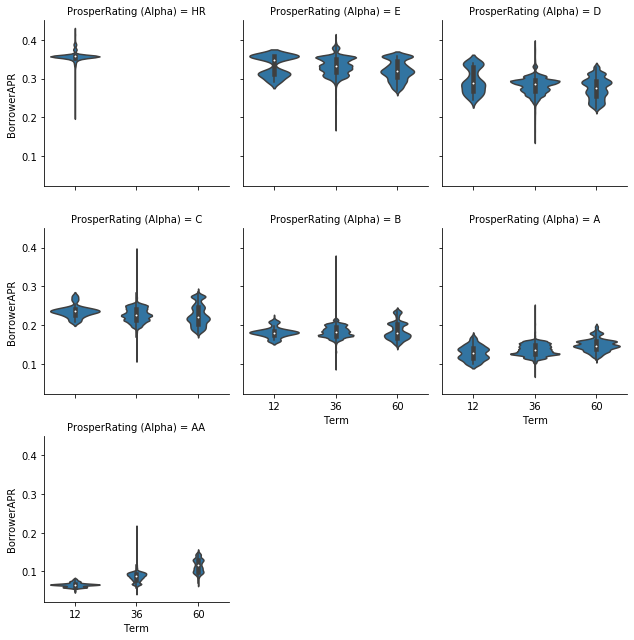

In [222]:
g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.violinplot, 'Term', 'BorrowerAPR')



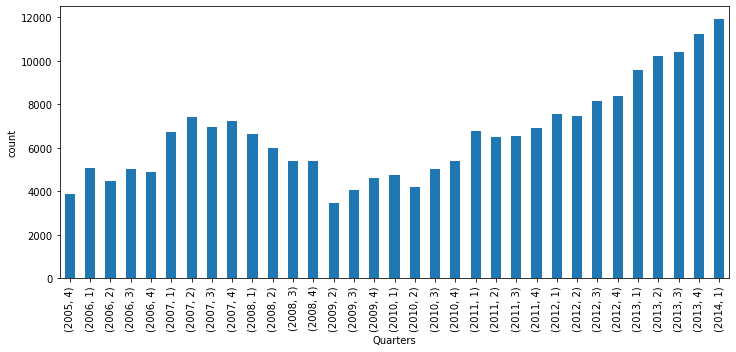

In [218]:
# plot the quarterly time distribution of loans
plt.figure(figsize=[12, 5])
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).mean()['LoanOriginalAmount'].plot(kind = 'bar')
plt.xlabel('Quarters')
plt.ylabel('count')
plt.show()



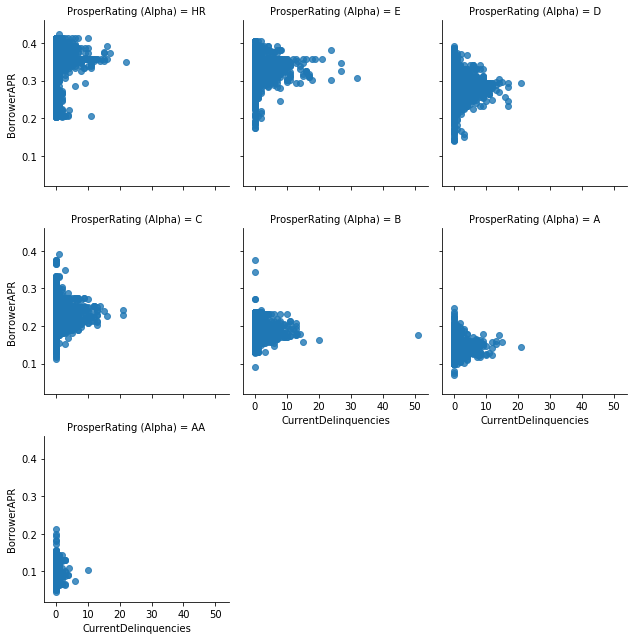

In [105]:
# Check the relationship between APR and current Delinquencies with in each ProsperRating.

g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.regplot, 'CurrentDelinquencies', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False)


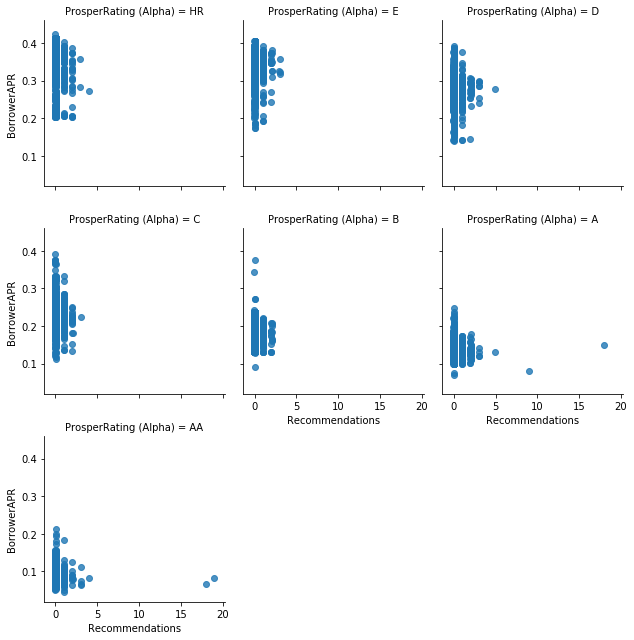

In [111]:
g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.regplot, 'Recommendations', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False)


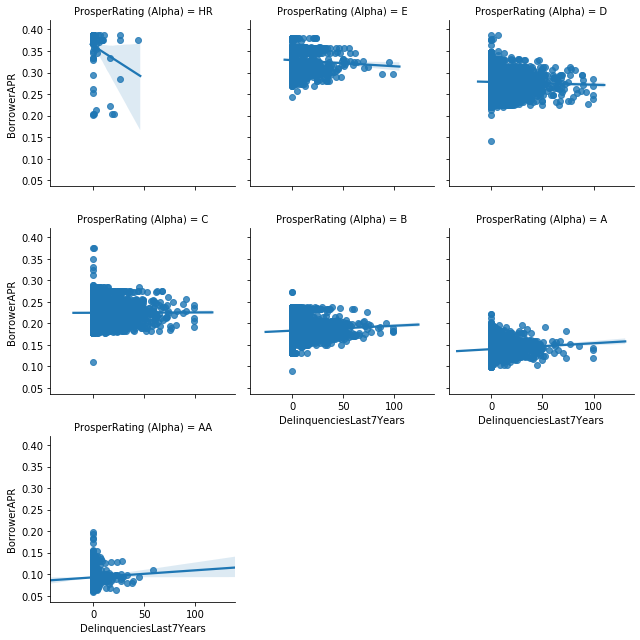

In [141]:
# Check the relationship between APR and current Delinquencies with in each ProsperRating.
df_new = df[df['ListingCreationDate']>= pd.Timestamp(2009,7,13)].reset_index()
df_new2 = df_new[df_new['LoanOriginalAmount'] > 6000].reset_index()
g = sb.FacetGrid(data = df_new2, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.regplot, 'DelinquenciesLast7Years', 'BorrowerAPR', x_jitter = 0.04, fit_reg = True)



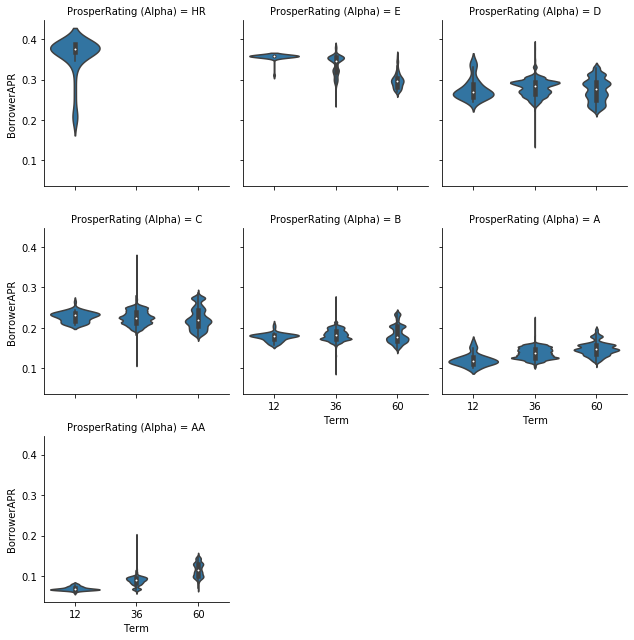

In [118]:
df_new = df[df['LoanOriginalAmount'] > 6000].reset_index()
#df1 = df[df['StatedMonthlyIncome'] <= 20000]
#df2 = df1[df1['IncomeVerifiable'] == True]
g = sb.FacetGrid(data = df_new, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.violinplot, 'Term', 'BorrowerAPR')


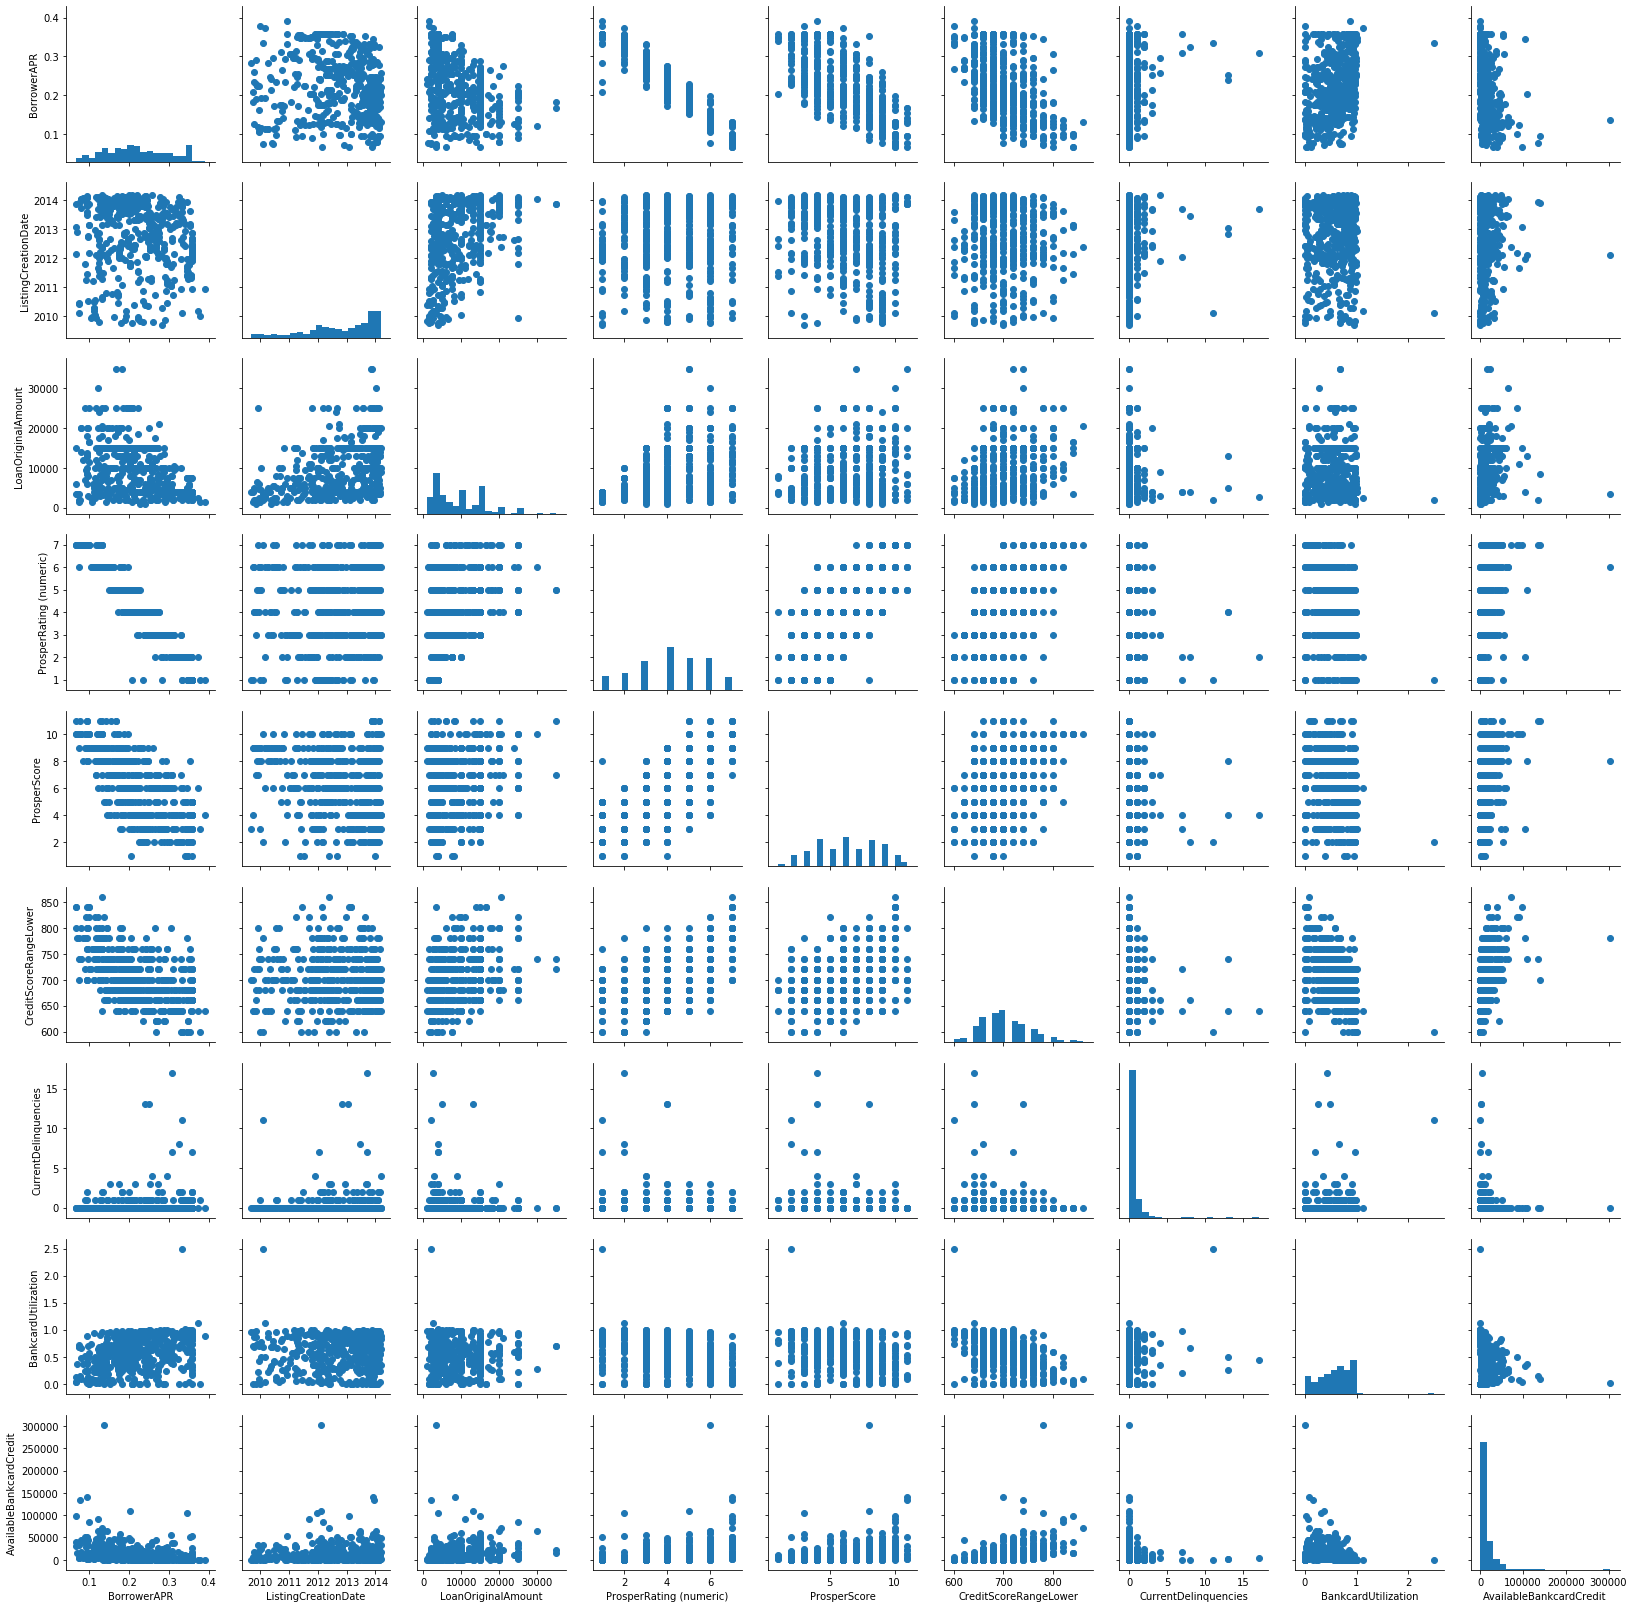

In [47]:
df_new = df[df['ListingCreationDate']>= pd.Timestamp(2009,7,13)].reset_index()
df_old = df[df['ListingCreationDate'] < pd.Timestamp(2009,7,13)]

# choose a shorter list of numerical features.
numeric_vars_fewer = ['BorrowerAPR','ListingCreationDate', 'LoanOriginalAmount','ProsperRating (numeric)',
                      'ProsperScore','CreditScoreRangeLower','CurrentDelinquencies','BankcardUtilization',
                      'AvailableBankcardCredit']

# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(df_new.shape[0], 500, replace = False)
df_samp2 = df_new.loc[samples,:]

g = sb.PairGrid(data = df_samp2, vars = numeric_vars_fewer)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

In [166]:
a = list(df.BorrowerAPR.value_counts().index)
a.sort(reverse = True)
a

[0.5122899999999999,
 0.5063300000000001,
 0.48873,
 0.46201000000000003,
 0.45857,
 0.42395,
 0.41355,
 0.40831,
 0.40745,
 0.40679,
 0.40481999999999996,
 0.40429,
 0.40315,
 0.40304,
 0.40243,
 0.40023000000000003,
 0.39951,
 0.39821,
 0.39795,
 0.39746,
 0.39571,
 0.39461999999999997,
 0.3946,
 0.39275,
 0.39265,
 0.39261,
 0.39226,
 0.3921,
 0.39171,
 0.39166999999999996,
 0.39155,
 0.39153000000000004,
 0.39142,
 0.39132,
 0.39100999999999997,
 0.39091,
 0.39071999999999996,
 0.38988,
 0.38896,
 0.38884,
 0.38845,
 0.38794,
 0.38745,
 0.38723,
 0.38711999999999996,
 0.38672,
 0.38661,
 0.3864,
 0.3862,
 0.38593,
 0.38588,
 0.38578,
 0.38569000000000003,
 0.38537,
 0.38488,
 0.38486,
 0.38468,
 0.38443,
 0.38438,
 0.38424,
 0.38414,
 0.38383,
 0.38373,
 0.38339,
 0.38318,
 0.38311,
 0.38295999999999997,
 0.38245,
 0.38235,
 0.3823,
 0.38211,
 0.38193,
 0.38177,
 0.38166,
 0.38127,
 0.38109,
 0.38084,
 0.38058000000000003,
 0.38056999999999996,
 0.38049,
 0.38037,
 0.38028,
 0.3800

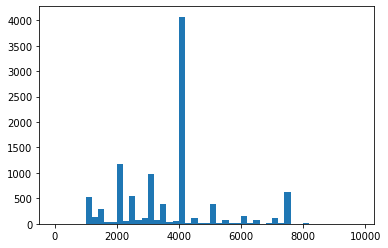

In [174]:
bins = np.arange(0,10000,200)
df_new = df[df['BorrowerAPR'] > 0.35].reset_index()
plt.hist(data = df_new, x = 'LoanOriginalAmount', bins = bins);

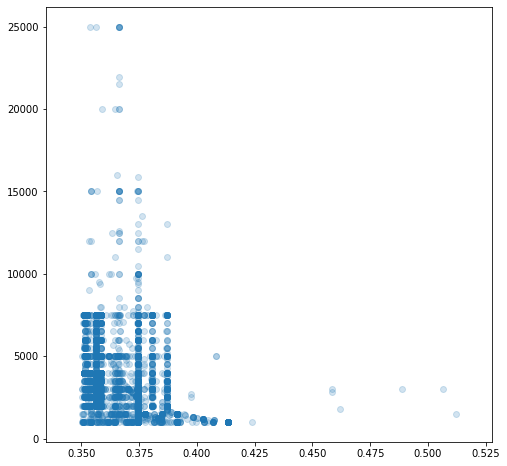

In [194]:
df_new = df[df['BorrowerAPR'] > 0.35].reset_index()
plt.figure(figsize = [8,8])
plt.scatter(data = df_new, x = 'BorrowerAPR', y = 'LoanOriginalAmount', alpha = 1/5);

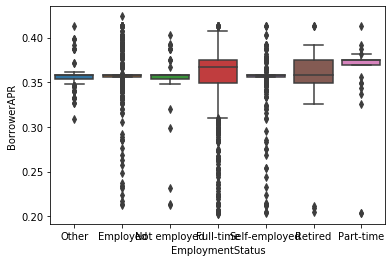

In [214]:
df_new['ProsperRating'] = df_new['ProsperRating (Alpha)']
df_new = df_new.query('LoanOriginalAmount < 8000 and ProsperRating == "HR"')

sb.boxplot(data = df_new, x = 'EmploymentStatus', y = 'BorrowerAPR');

In [ ]:
df_new = df[df['BorrowerAPR'] > 0.3].reset_index()

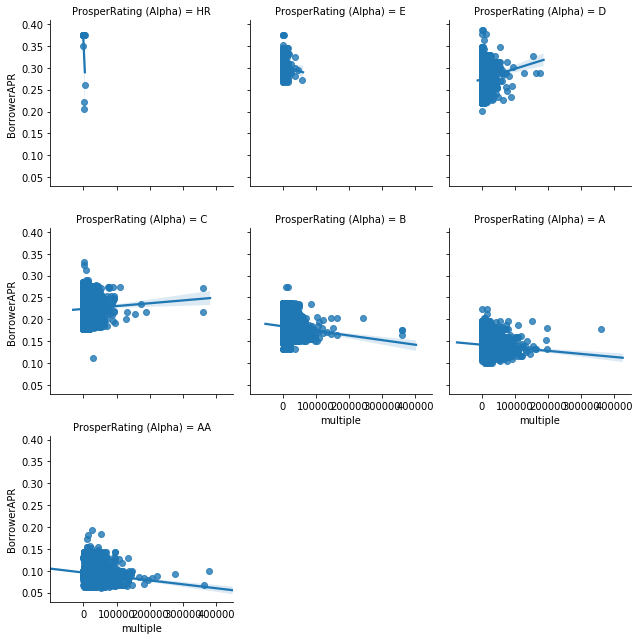

In [189]:
# research 35%

df_new = df[df['LoanOriginalAmount'] > 8000].reset_index()
df_new['multiple'] = (1-df_new['BankcardUtilization']) * df_new['AvailableBankcardCredit']
g = sb.FacetGrid(data = df_new, col = 'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.regplot, 'multiple', 'BorrowerAPR', x_jitter = 0.04, fit_reg = True)




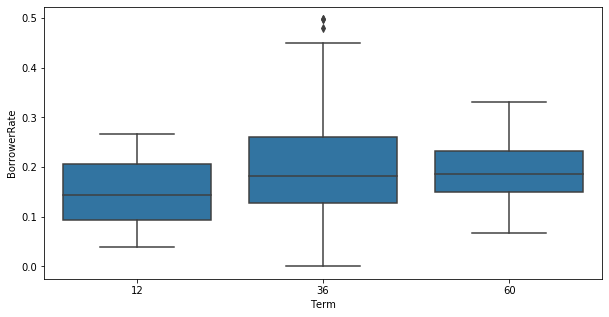

In [172]:
plt.figure(figsize = [10,5])
sb.boxplot(data = df, x = 'Term', y = 'BorrowerRate',color = base_color);

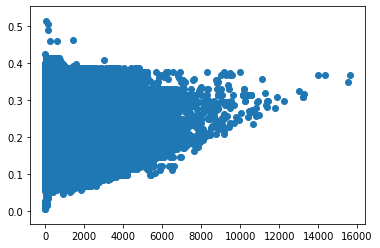

In [174]:
plt.scatter(data =df, x = 'LP_InterestandFees', y = 'BorrowerAPR')



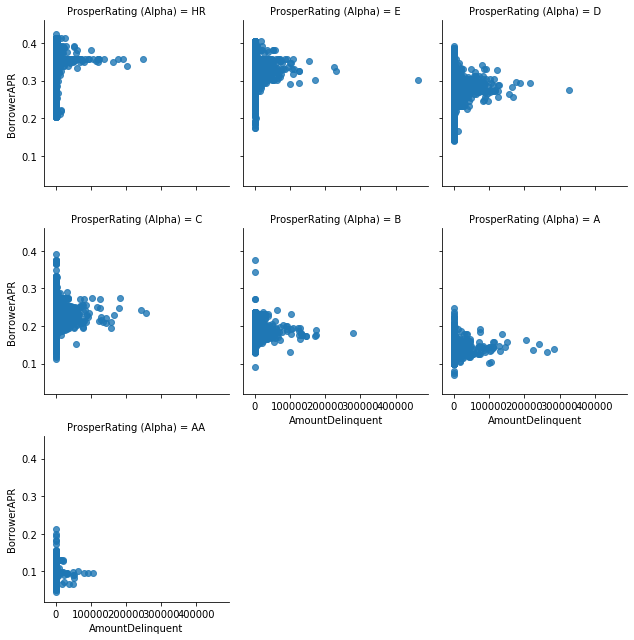

In [228]:
g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 3) # set hue to a column
g.map(sb.regplot, 'AmountDelinquent', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False)



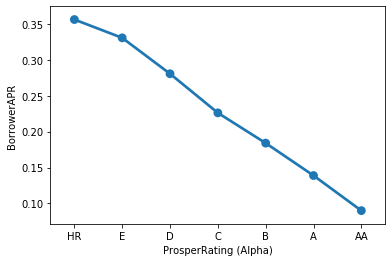

In [150]:
sb.pointplot(data = df, x ='ProsperRating (Alpha)' , y = 'BorrowerAPR')

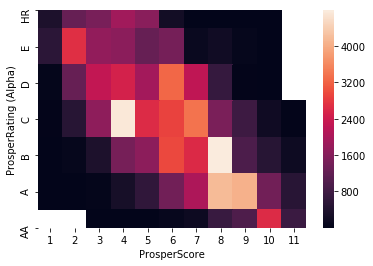

In [155]:
ct_counts = df.groupby(['ProsperRating (Alpha)','ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperRating (Alpha)', 
                            columns = 'ProsperScore', values = 'count')
sb.heatmap(ct_counts)

In [131]:
df[['StatedMonthlyIncome','IncomeVerifiable','LoanOriginalAmount']]

,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount
0,3083.333333,True,9425
1,6125.000000,True,10000
2,2083.333333,True,3001
3,2875.000000,True,10000
4,9583.333333,True,15000
...,...,...,...
113932,4333.333333,True,10000
113933,8041.666667,True,2000
113934,2875.000000,True,10000
113935,3875.000000,True,15000


In [133]:
df['StatedMonthlyIncome']/df['LoanOriginalAmount']

0         0.327144
1         0.612500
2         0.694213
3         0.287500
4         0.638889
            ...   
113932    0.433333
113933    4.020833
113934    0.287500
113935    0.258333
113936    2.291667
Length: 113937, dtype: float64

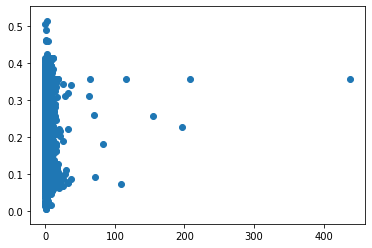

In [134]:
plt.scatter(df['StatedMonthlyIncome']/df['LoanOriginalAmount'] , df.BorrowerAPR)

In [ ]:
# relation between ProsperRating (Alpha) and ProsperScore


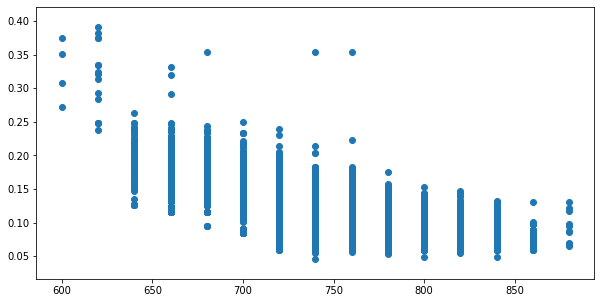

In [116]:
df2 = df.query('ProsperScore == "10"')

plt.figure(figsize = [10,5])
plt.scatter(data = df2, x = 'CreditScoreRangeLower', y = 'BorrowerAPR',alpha = 1)


In [125]:
samples = np.random.choice(df.shape[0], 10000, replace = False)
df_samp = df.loc[samples,:]

df_samp['mul'] = df_samp['LoanOriginalAmount'] * df_samp['BorrowerAPR']


In [126]:
df_samp['mul'].value_counts()

1431.880    219
1414.240     59
1425.720     38
715.940      33
1073.910     31
           ... 
548.670       1
807.885       1
3054.480      1
268.220       1
2297.160      1
Name: mul, Length: 6184, dtype: int64

/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3151., 3334., 1694., 1083.,  473.,  158.,   80.,   13.,    8.,
           4.]),
 array([  44.97 ,  930.798, 1816.626, 2702.454, 3588.282, 4474.11 ,
        5359.938, 6245.766, 7131.594, 8017.422, 8903.25 ]),
 <a list of 10 Patch objects>)

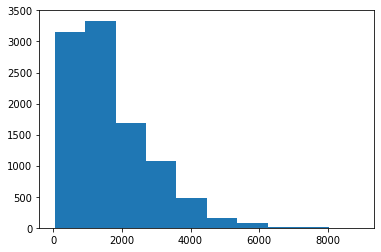

In [127]:
plt.hist(data = df_samp, x = 'mul')

,LoanOriginalAmount,BorrowerAPR
LoanOriginalAmount,NaN,NaN
BorrowerAPR,NaN,NaN


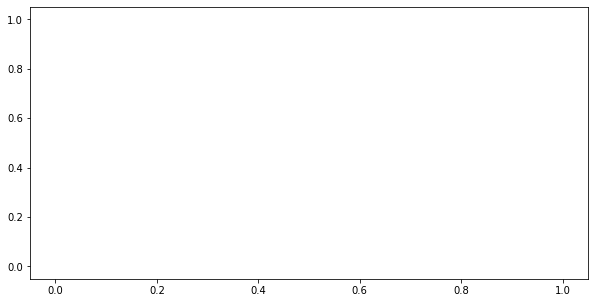

In [148]:
df3 = df.query('CreditScoreRangeLower == 550')
plt.figure(figsize = [10,5])
plt.scatter(data = df3, x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha = 1/10)
df3[[ 'LoanOriginalAmount','BorrowerAPR']].corr()


(-0.5, 20)

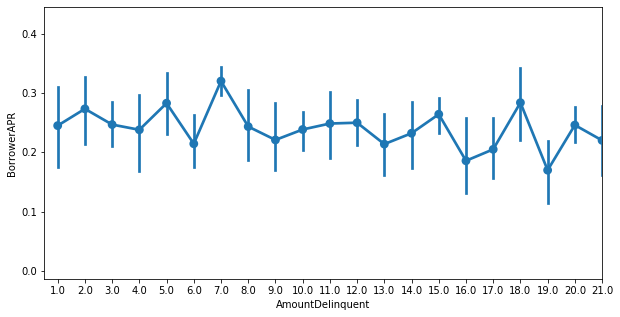

In [219]:
bins = [0,2,5,10,20,50,100,200,500,1000]
plt.figure(figsize=[10, 5])
sb.pointplot(data = df[df.AmountDelinquent != 0], x = 'AmountDelinquent', y = 'BorrowerAPR', alpha = 1)
plt.xlim(-0.5,20)


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


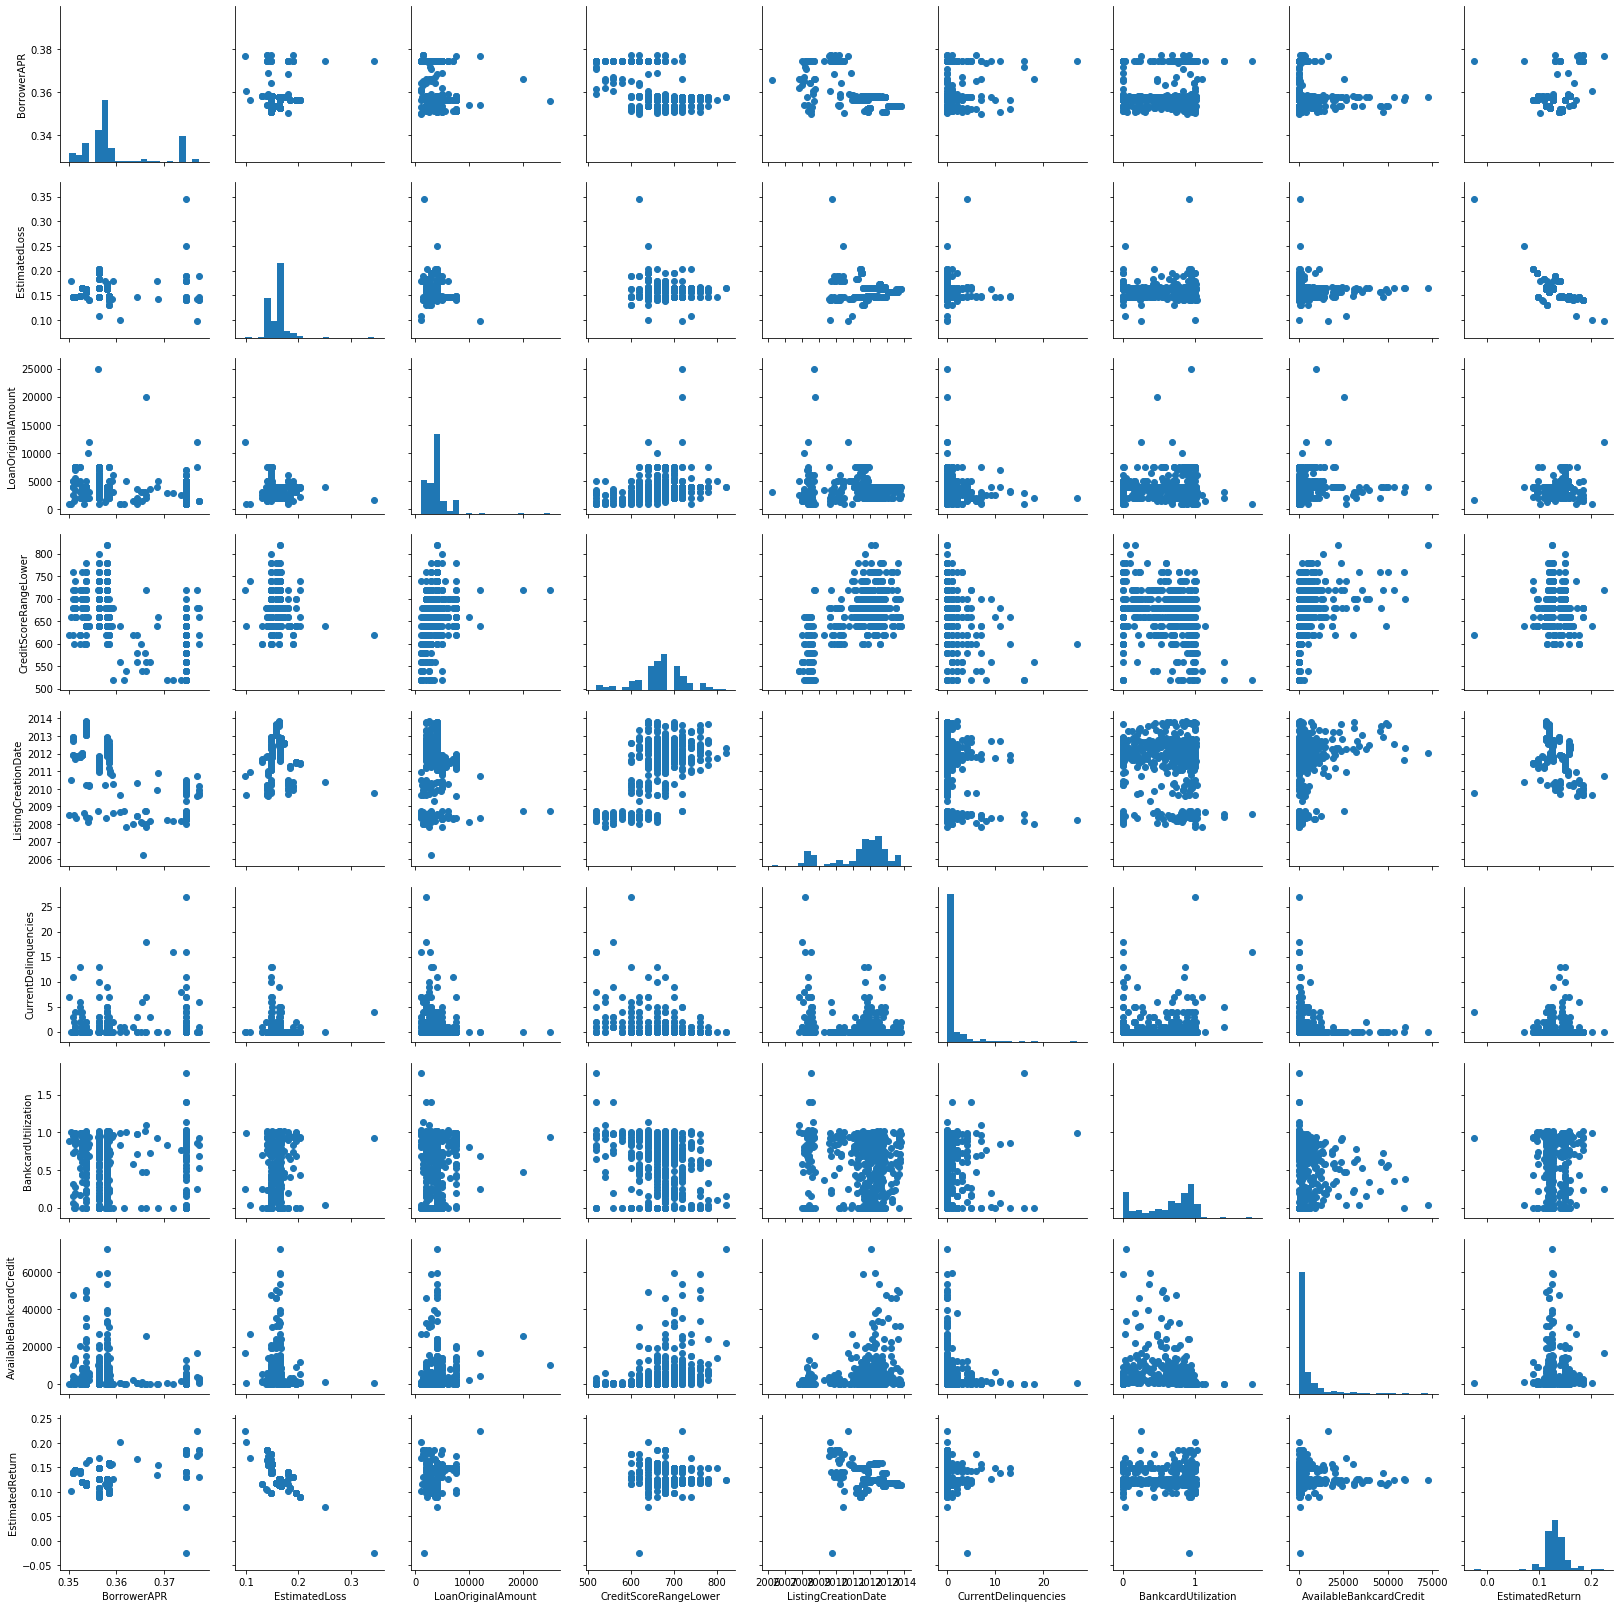

In [237]:
df2 = df.query('0.35< BorrowerAPR<0.38').reset_index()

samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_samp = df2.loc[samples,:]

g = sb.PairGrid(data = df2_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

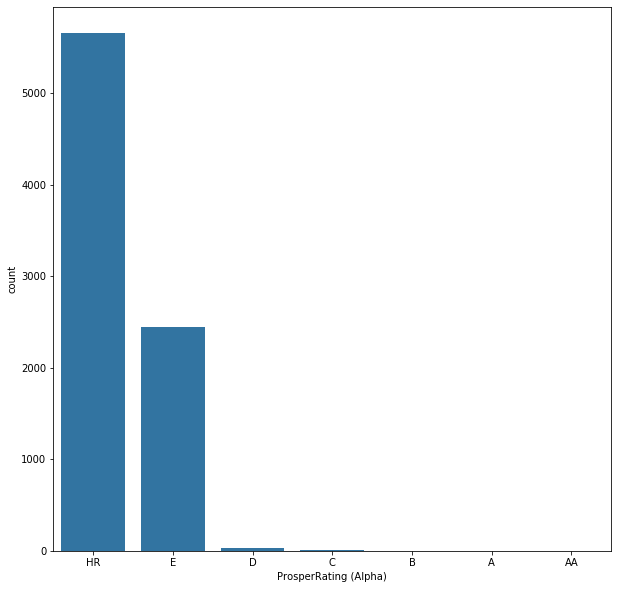

In [239]:
plt.figure(figsize = [10, 10])
sb.countplot(data = df2, x = 'ProsperRating (Alpha)',color = base_color)